<a href="https://colab.research.google.com/github/aiswaryarkamath/CampusRecruitment/blob/aishu_dev/campus_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

In [ ]:
df1 = pd.read_csv('/content/train.csv')

In [ ]:
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [ ]:
df1.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
# df1.isnull().sum()

In [ ]:
# df1.columns.tolist()

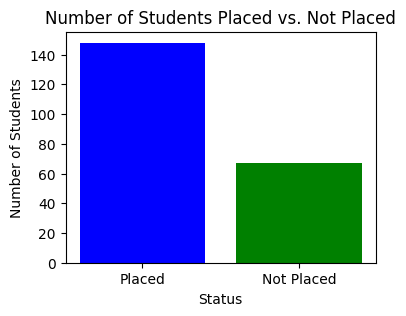

In [ ]:
# Assuming 'status' column represents 'Placed' or 'Not Placed'
placed_count = df1['status'].value_counts()['Placed']
not_placed_count = df1['status'].value_counts()['Not Placed']

# Create a bar plot
plt.figure(figsize=(4, 3))
plt.bar(['Placed', 'Not Placed'], [placed_count, not_placed_count], color=['blue', 'green'])
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.title('Number of Students Placed vs. Not Placed')
plt.show()

In [ ]:
# Drop irrelevant columns
df = df1.drop(['salary'], axis=1)

In [ ]:
#encode the features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_p'] = le.fit_transform(df['ssc_p'])
df['hsc_p'] = le.fit_transform(df['hsc_p'])
df['degree_p'] = le.fit_transform(df['degree_p'])
df['etest_p'] = le.fit_transform(df['etest_p'])
df['mba_p'] = le.fit_transform(df['mba_p'])
df['status'] = le.fit_transform(df['status'])

# Split data
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model selection

In [ ]:
# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier()
}

Hyperparameter tuning and model training


In [ ]:
# Hyperparameter tuning for other models
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Create a pipeline with the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Define hyperparameter grid based on the model
    if model_name == 'Logistic Regression':
        param_grid = {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga']  # Add solver options
        }
    elif model_name == 'SVM':
        param_grid = {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf', 'poly'],  # Add more kernels
            'classifier__gamma': ['scale', 'auto', 0.1, 1]  # Add gamma options
        }
    elif model_name == 'Gradient Boosting':
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]  # Add max_depth
        }
    elif model_name == 'k-NN':
        param_grid = {
            'classifier__n_neighbors': [3, 5, 7, 9],  # More neighbors
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]  # Add p for Minkowski distance (1 for Manhattan, 2 for Euclidean)
        }
    else:  # Default for Random Forest
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__criterion': ['gini', 'entropy']  # Add criterion options
        }

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}:", grid_search.best_params_)
    print(f"Best accuracy for {model_name}:", grid_search.best_score_)
    print("-" * 30)

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best accuracy for Logistic Regression: 0.8724369747899159
------------------------------
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best accuracy for Random Forest: 0.8784873949579832
------------------------------
Tuning hyperparameters for SVM...
Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best accuracy for SVM: 0.8547899159663865
------------------------------
Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best accuracy for Gradient Boosting: 0.87815126

In [ ]:
# prompt: give me the accuracy, precision, recall, f1 score for all the best models above

# Assuming you have already trained and tuned the models as in the previous code

# Evaluate the best models on the test set
for model_name, model in models.items():
    # Create a pipeline with the best parameters
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the pipeline with best parameters using grid_search.best_estimator_
    if model_name == 'Logistic Regression':
        pipeline.set_params(classifier__C=0.1, classifier__penalty='l2', classifier__solver='liblinear')
    elif model_name == 'SVM':
        pipeline.set_params(classifier__C=10, classifier__gamma='scale', classifier__kernel='rbf')
    elif model_name == 'Gradient Boosting':
        pipeline.set_params(classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100)
    elif model_name == 'k-NN':
        pipeline.set_params(classifier__n_neighbors=3, classifier__p=2, classifier__weights='uniform')
    else:  # Random Forest
        pipeline.set_params(classifier__criterion='gini', classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200)
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 30)

Metrics for Logistic Regression:
Accuracy: 0.8372
Precision: 0.8750
Recall: 0.9032
F1-score: 0.8889
------------------------------
Metrics for Random Forest:
Accuracy: 0.8140
Precision: 0.8485
Recall: 0.9032
F1-score: 0.8750
------------------------------
Metrics for SVM:
Accuracy: 0.8372
Precision: 0.8529
Recall: 0.9355
F1-score: 0.8923
------------------------------
Metrics for Gradient Boosting:
Accuracy: 0.8605
Precision: 0.8788
Recall: 0.9355
F1-score: 0.9062
------------------------------
Metrics for k-NN:
Accuracy: 0.7907
Precision: 0.8235
Recall: 0.9032
F1-score: 0.8615
------------------------------


Implimenting Voting classifier

Metrics for Voting Classifier:
Accuracy: 0.8140
Precision: 0.8286
Recall: 0.9355
F1-score: 0.8788
------------------------------


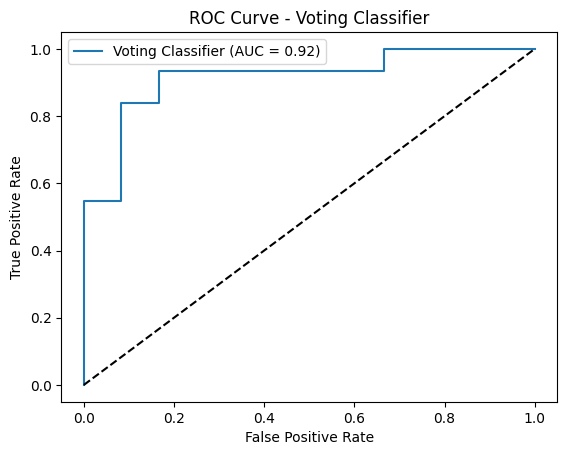

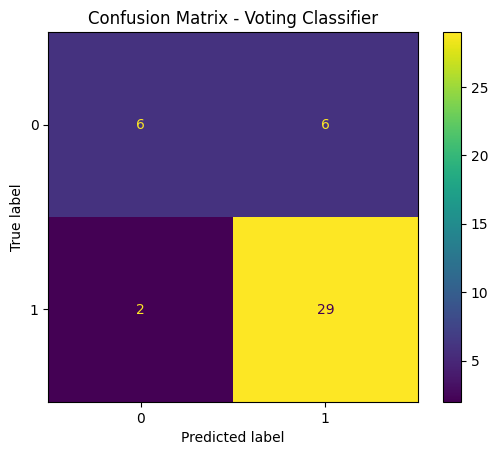

In [ ]:
# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=2)),
    ('svm', SVC(probability=True, C=10, gamma='scale', kernel='rbf')),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ('knn', KNeighborsClassifier(n_neighbors=3, p=2, weights='uniform'))
], voting='soft')  # Use 'soft' voting for probabilistic predictions

# Preprocessing pipeline
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the voting classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_classifier)
])

# Train the voting classifier
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the voting classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Metrics for Voting Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("-" * 30)

# plot the ROC curve and confusion matrix for the voting classifier
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc='best')
plt.show()

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.title('Confusion Matrix - Voting Classifier')
plt.show()